1. What is the performance metric you choose and explain the reason for the choice
2. Use K-fold cross validation (k=5) to build Multiple Linear Regression model
3. Build Step-Multiple Linear Regression model using recursive feature elimination
4. Identify if there is any multi collinearity using VIF
5. Apply PCA and choose top n components and build multiple regression model.
6. Build Lasso Regression model
7. Apply Ridge Regression model
8. Construct Elastic net model
9. Compare the results from all the 6 models
10. Identify the top 5 important variables

# performance metrics

1) MAE (Mean Absolute Error):
Formula: MAE = (1/n) * Σ|actual - predicted|
MAE measures the average magnitude of the errors between the actual and predicted values. It gives you an idea of how far off your predictions are on average.
MAE is robust to outliers since it only considers the absolute differences between actual and predicted values.
Reason for choice: MAE is a simple and interpretable metric. It provides a straightforward understanding of the average error magnitude, which is useful for assessing the overall model accuracy.

2) MSE (Mean Squared Error):
Formula: MSE = (1/n) * Σ(actual - predicted)^2
MSE measures the average squared differences between actual and predicted values. It amplifies larger errors due to squaring.
MSE gives more weight to larger errors, which can be problematic if you have outliers in your data.
Reason for choice: MSE is a widely used metric that penalizes larger errors more than MAE. This can be useful in scenarios where larger errors should have a greater impact on the evaluation.

3) RMSE (Root Mean Squared Error):
Formula: RMSE = √MSE
RMSE is the square root of MSE and is measured in the same units as the target variable.
RMSE is useful because it provides an interpretable measure of the average error in the same units as the original data.
Reason for choice: RMSE is often used alongside MSE to provide a more understandable metric that is directly interpretable in the context of the original data.

4) R² (Coefficient of Determination):
Formula: R² = 1 - (SSR/SST), where SSR is the sum of squared residuals and SST is the total sum of squares.
R² represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
R² ranges from 0 to 1, where 0 indicates that the model does not explain the variance, and 1 indicates a perfect fit.
Reason for choice: R² provides insight into how well the model explains the variability in the data. It's particularly valuable when you want to know how much of the variance in the dependent variable is captured by your model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('main_miterm.xlsx')

In [3]:
df

,Unnamed: 0,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days,route
0,0,136539,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.354167,21224 to 62707
1,1,136954,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.083333,L1W 3H9 to 13619
2,2,136701,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.375000,46037 to 73107
3,3,136955,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.083333,L1W 3H9 to 13619
4,4,136995,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.083333,L1W 3H9 to 13619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,18734,147270,R,707,26405,1500.00,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00,1.895833,84104 to 85353
18201,18735,147271,R,1230,42500,0.00,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00,2.708333,84088 to 76102
18202,18736,148075,R,1924,42000,2500.00,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00,2.916667,78521 to 95380
18203,18737,148223,R,2185,40000,5300.00,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00,3.645833,4915 to 29209


Removing columns which are of no use in prediction

In [4]:
df=df.drop(['ORDER_NBR','FIRST_PICK_ZIP','FIRST_PICK_EARLY_APPT','FIRST_PICK_LATE_APPT','LAST_DELIVERY_ZIP','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT','CREATED_DATE','route'], axis=1)
df

,Unnamed: 0,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,Days
0,0,53 FLATBED,802,42000,0.00,N,1.354167
1,1,V,0,40500,875.00,N,1.083333
2,2,NaN,774,0,88.14,N,6.375000
3,3,V,0,40500,875.00,N,1.083333
4,4,V,0,40500,875.00,N,1.083333
...,...,...,...,...,...,...,...
18200,18734,R,707,26405,1500.00,N,1.895833
18201,18735,R,1230,42500,0.00,N,2.708333
18202,18736,R,1924,42000,2500.00,N,2.916667
18203,18737,R,2185,40000,5300.00,N,3.645833


Dummifying IS_HAZARDOUS column 

In [5]:
one_hot_encoded=pd.get_dummies(df['IS_HAZARDOUS'], prefix='hazardous',drop_first=True)
# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded

,Unnamed: 0,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,Days,hazardous_Y
0,0,53 FLATBED,802,42000,0.00,N,1.354167,False
1,1,V,0,40500,875.00,N,1.083333,False
2,2,NaN,774,0,88.14,N,6.375000,False
3,3,V,0,40500,875.00,N,1.083333,False
4,4,V,0,40500,875.00,N,1.083333,False
...,...,...,...,...,...,...,...,...
18200,18734,R,707,26405,1500.00,N,1.895833,False
18201,18735,R,1230,42500,0.00,N,2.708333,False
18202,18736,R,1924,42000,2500.00,N,2.916667,False
18203,18737,R,2185,40000,5300.00,N,3.645833,False


In [6]:
df_encoded['hazardous_Y']= df_encoded["hazardous_Y"].astype(int)
#df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded

,Unnamed: 0,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,IS_HAZARDOUS,Days,hazardous_Y
0,0,53 FLATBED,802,42000,0.00,N,1.354167,0
1,1,V,0,40500,875.00,N,1.083333,0
2,2,NaN,774,0,88.14,N,6.375000,0
3,3,V,0,40500,875.00,N,1.083333,0
4,4,V,0,40500,875.00,N,1.083333,0
...,...,...,...,...,...,...,...,...
18200,18734,R,707,26405,1500.00,N,1.895833,0
18201,18735,R,1230,42500,0.00,N,2.708333,0
18202,18736,R,1924,42000,2500.00,N,2.916667,0
18203,18737,R,2185,40000,5300.00,N,3.645833,0


In [7]:
df=df_encoded.drop(['IS_HAZARDOUS'], axis=1)
df

,Unnamed: 0,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y
0,0,53 FLATBED,802,42000,0.00,1.354167,0
1,1,V,0,40500,875.00,1.083333,0
2,2,NaN,774,0,88.14,6.375000,0
3,3,V,0,40500,875.00,1.083333,0
4,4,V,0,40500,875.00,1.083333,0
...,...,...,...,...,...,...,...
18200,18734,R,707,26405,1500.00,1.895833,0
18201,18735,R,1230,42500,0.00,2.708333,0
18202,18736,R,1924,42000,2500.00,2.916667,0
18203,18737,R,2185,40000,5300.00,3.645833,0


In [8]:
18205-945

17260

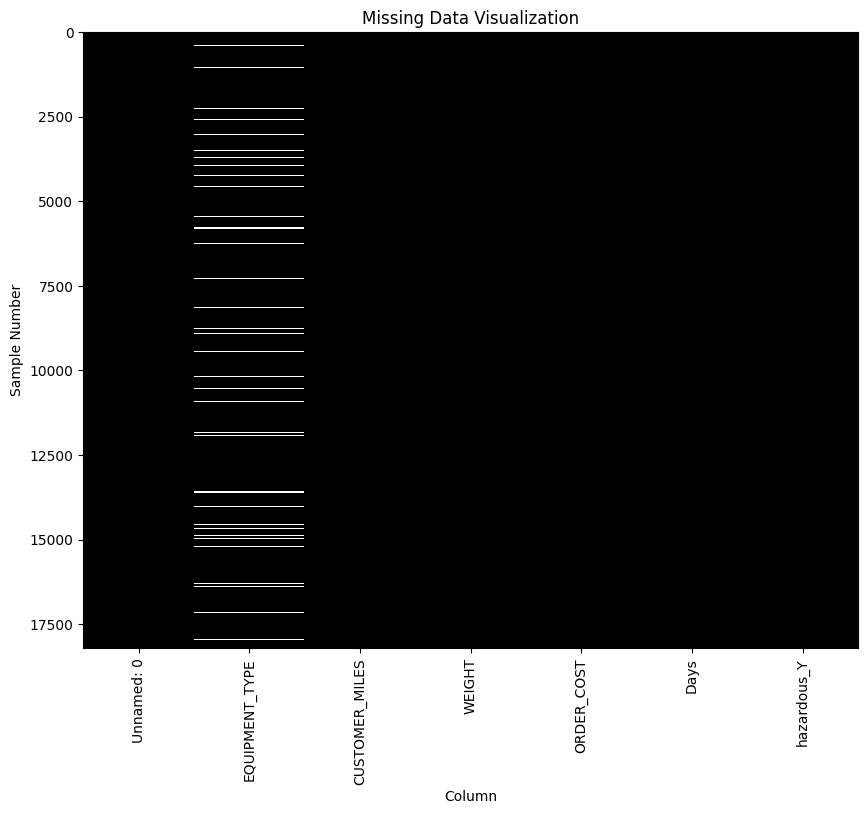

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)

plt.xlabel("Column")
plt.ylabel("Sample Number")
plt.title("Missing Data Visualization")

plt.show()

In [10]:
df = df.dropna()
df.isna().sum()

Unnamed: 0        0
EQUIPMENT_TYPE    0
CUSTOMER_MILES    0
WEIGHT            0
ORDER_COST        0
Days              0
hazardous_Y       0
dtype: int64

In [11]:
df

,Unnamed: 0,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y
0,0,53 FLATBED,802,42000,0.0,1.354167,0
1,1,V,0,40500,875.0,1.083333,0
3,3,V,0,40500,875.0,1.083333,0
4,4,V,0,40500,875.0,1.083333,0
5,5,V,0,40500,1050.0,1.166667,0
...,...,...,...,...,...,...,...
18200,18734,R,707,26405,1500.0,1.895833,0
18201,18735,R,1230,42500,0.0,2.708333,0
18202,18736,R,1924,42000,2500.0,2.916667,0
18203,18737,R,2185,40000,5300.0,3.645833,0


In [12]:
df=df.drop(['Unnamed: 0'], axis=1)
df

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y
0,53 FLATBED,802,42000,0.0,1.354167,0
1,V,0,40500,875.0,1.083333,0
3,V,0,40500,875.0,1.083333,0
4,V,0,40500,875.0,1.083333,0
5,V,0,40500,1050.0,1.166667,0
...,...,...,...,...,...,...
18200,R,707,26405,1500.0,1.895833,0
18201,R,1230,42500,0.0,2.708333,0
18202,R,1924,42000,2500.0,2.916667,0
18203,R,2185,40000,5300.0,3.645833,0


In [13]:
df.columns

Index(['EQUIPMENT_TYPE', 'CUSTOMER_MILES', 'WEIGHT', 'ORDER_COST', 'Days',
       'hazardous_Y'],
      dtype='object')

In [14]:
df

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y
0,53 FLATBED,802,42000,0.0,1.354167,0
1,V,0,40500,875.0,1.083333,0
3,V,0,40500,875.0,1.083333,0
4,V,0,40500,875.0,1.083333,0
5,V,0,40500,1050.0,1.166667,0
...,...,...,...,...,...,...
18200,R,707,26405,1500.0,1.895833,0
18201,R,1230,42500,0.0,2.708333,0
18202,R,1924,42000,2500.0,2.916667,0
18203,R,2185,40000,5300.0,3.645833,0


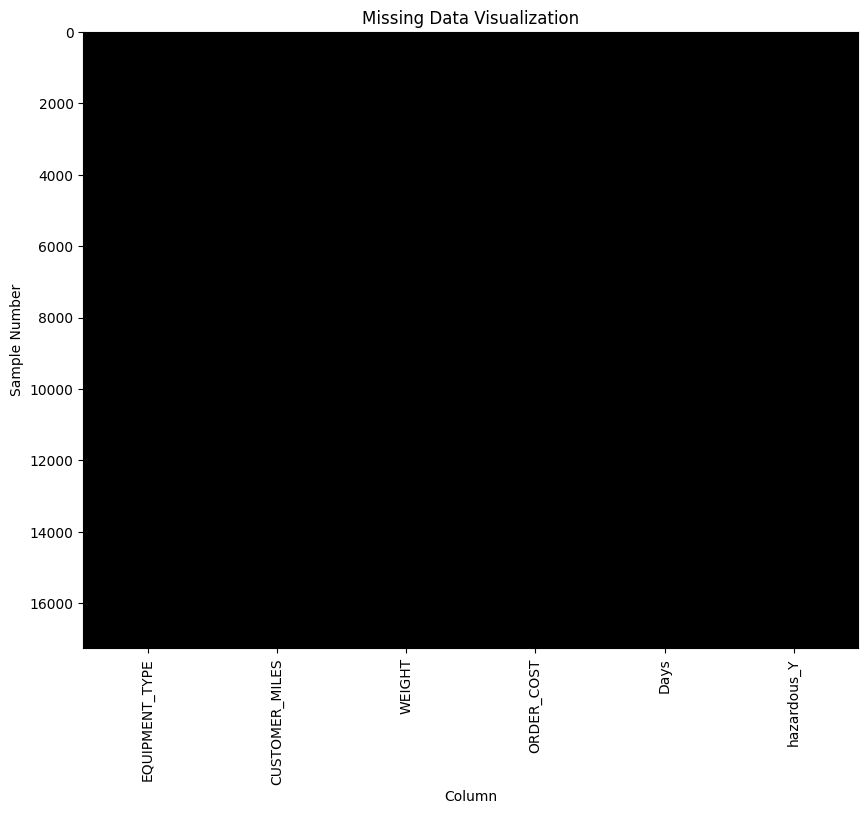

In [15]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)

plt.xlabel("Column")
plt.ylabel("Sample Number")
plt.title("Missing Data Visualization")

plt.show()

In [16]:
# define the categorical columns
categorical_columns = ['EQUIPMENT_TYPE']

# create dummy variables for the categorical columns
df_main = pd.get_dummies(df, columns = categorical_columns, drop_first=True, prefix='type_')

# print the new dataset
df_main

,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y,type__D-LTL,type__DRAY,type__DROP,type__F,type__FH,...,type__V/R,type__VA,type__VCAR,type__VM,type__VOLUME LTL,type__VP,type__VR,type__VS,type__VV,type__VZ
0,802,42000,0.0,1.354167,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,40500,875.0,1.083333,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,40500,875.0,1.083333,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,40500,875.0,1.083333,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,40500,1050.0,1.166667,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,707,26405,1500.0,1.895833,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18201,1230,42500,0.0,2.708333,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18202,1924,42000,2500.0,2.916667,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,2185,40000,5300.0,3.645833,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
import numpy as np

In [18]:
# Get boolean columns
bool_cols = [col for col in df_main if df_main[col].dtype == np.bool_]

# Create a dictionary with column types
column_types = {col: 'int' for col in bool_cols}

# Convert boolean columns to int and keep 'days' column as float
df_main1 = df_main.astype(column_types)

In [19]:
from sklearn.model_selection import train_test_split # importing neccessary modules
X=df_main1.drop(['ORDER_COST','Days'], axis=1)
y=df_main1['ORDER_COST']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train test split


In [20]:
import statsmodels.api as sm

In [21]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             ORDER_COST   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:52:56   Log-Likelihood:                -95993.
No. Observations:               12081   AIC:                         1.920e+05
Df Residuals:                   12051   BIC:                         1.923e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
CUSTOMER_MILES       1.0570      0.013  

In [22]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAE_Test','MSE_Test','RMSE_Test','R^2'])


def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    R2 = metrics.r2_score(train_act,train_pred)
    s1 = pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R2],
                                           index=dataframe.columns)
    df_new_row = pd.DataFrame([s1])
    dataframe = pd.concat([dataframe, df_new_row], ignore_index=True)
    return(dataframe)

#defining MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#definition of coefficient function
def coeff(model_title,modelparams):
    tempdf=pd.DataFrame(modelparams)
    tempdf.rename(columns = {0:model_title},inplace = True)
    DF=pd.concat([coefficients,tempdf],axis=1)
    return(DF) 



In [23]:
#Model Building

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression #import neccesary modules
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [25]:
df_main1

,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y,type__D-LTL,type__DRAY,type__DROP,type__F,type__FH,...,type__V/R,type__VA,type__VCAR,type__VM,type__VOLUME LTL,type__VP,type__VR,type__VS,type__VV,type__VZ
0,802,42000,0.0,1.354167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,40500,1050.0,1.166667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,707,26405,1500.0,1.895833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18201,1230,42500,0.0,2.708333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18202,1924,42000,2500.0,2.916667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18203,2185,40000,5300.0,3.645833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X=df_main1.drop(['ORDER_COST','Days'], axis=1)
y=df_main1['ORDER_COST']
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train test split
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
kush_model = LinearRegression()
kush_model.fit(X_train,y_train)
print(kush_model.score(X_train,y_train))# k-fold CV (using all the  variables)
#kush_model = LinearRegression()

0.4647193953556641


In [27]:
#Get error metrics
scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.01922,466804.382101,683.230841,463.530463,454970.890772,674.515301,0.464719


In [28]:
df_main2=df_main1.drop(df_main[df_main['WEIGHT']==300000].index)
X=df_main2.drop(['ORDER_COST','Days'], axis=1)
y=df_main2['ORDER_COST']
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train test split
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
kush_model = LinearRegression()
kush_model.fit(X_train,y_train)
print(kush_model.score(X_train,y_train))# k-fold CV (using all the  variables)
#kush_model = LinearRegression()

0.46890875412528


In [29]:
# #Get error metrics
# scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR_Dropping_Days_Outliers",scores)
# scores

In [30]:
df_main3=df_main2.drop(df_main[df_main['CUSTOMER_MILES']==0].index)
X=df_main3.drop(['ORDER_COST','Days'], axis=1)
y=df_main3['ORDER_COST']
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train test split
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
kush_model = LinearRegression()
kush_model.fit(X_train,y_train)
print(kush_model.score(X_train,y_train))# k-fold CV (using all the  variables)
#kush_model = LinearRegression()

0.509702936908726


In [31]:
# #Get error metrics
# scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR_removing0miles",scores)
# scores

In [32]:
df_main4=df_main1.drop(df_main[(df_main['ORDER_COST']==0)].index)
X=df_main4.drop(['ORDER_COST'], axis=1)
y=df_main4['ORDER_COST']
# print(X.shape)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #train test split
# X_train.shape, X_test.shape, y_train.shape, y_test.shape
kush_model = LinearRegression()
kush_model.fit(X_train,y_train)
print(kush_model.score(X_train,y_train))# k-fold CV (using all the  variables)
#kush_model = LinearRegression()

0.8397977436392325


In [33]:
# #Get error metrics
# scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR_removing0ordercost",scores)
# scores

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_vars = ['CUSTOMER_MILES', 'WEIGHT','Days']
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [35]:
kush_model = LinearRegression()
kush_model.fit(X_train,y_train)
print(kush_model.score(X_train,y_train))

0.8397924537205719


In [36]:
#Get error metrics
scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR_Standardization",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,466804.382101,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,130805.725666,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792


In [37]:
# the other way of doing the same thing (more explicit)
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
CVscores = cross_val_score(kush_model, X_train, y_train, scoring='r2', cv=folds)
CVscores  

array([ 8.46000591e-01,  8.20111134e-01,  8.41225403e-01, -1.29254866e+18,
       -1.42580576e+22])

In [38]:
print('mean_squared_error:', list(np.multiply(cross_val_score(kush_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5), -1)))
print('mean_absolute_percentage_error:',list(np.multiply(cross_val_score(kush_model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=5), -1)))
print('root_mean_squared_error:', list(np.multiply(cross_val_score(kush_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5),-1)))
print('median_absolute_error:',list(np.multiply(cross_val_score(kush_model, X_train, y_train, scoring='neg_median_absolute_error', cv=5),-1)))


mean_squared_error: [120908.31951336282, 121126.53567822785, 1.0015349434200672e+28, 129806.92380277837, 7.635678512462168e+26]
mean_absolute_percentage_error: [0.2437451331209773, 0.24223860427208396, 606981694.5525141, 0.2432711313271951, 932300620.4528291]
root_mean_squared_error: [347.718736212708, 348.0323773418615, 100076717742942.95, 360.28727954616767, 27632731519815.715]
median_absolute_error: [171.47065652800882, 168.5, 182.0, 181.1273865575331, 185.125]


In [39]:
from sklearn.feature_selection import RFE #import RFE
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 7))}]


# step-3: perform grid search
# 3.1 specify model
kush_model = LinearRegression()
kush_model.fit(X_train, y_train)
rfe = RFE(kush_model)             

# 3.2 call GridSearchCV()
model_cv_R2 = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
result_R2=model_cv_R2.fit(X_train, y_train)                  


# 3.2.1 call GridSearchCV()
model_cv_RMSE = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
result_RMSE=model_cv_RMSE.fit(X_train, y_train)  

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [40]:
# cv results
cv_results_R2 = pd.DataFrame(result_R2.cv_results_)
cv_results_R2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.448682,0.003812,0.001146,0.000053,1,{'n_features_to_select': 1},0.012585,0.000676,0.001263,-0.000608,...,0.004186,0.004947,5,0.006863,0.000535,0.000328,0.010215,0.008273,0.005243,0.004071
1,0.455117,0.006769,0.001118,0.000032,2,{'n_features_to_select': 2},0.010864,0.000675,0.001259,-0.000625,...,0.003837,0.004382,6,0.009298,0.000636,0.000429,0.011212,0.009254,0.006166,0.004654
2,0.450594,0.006418,0.001163,0.000058,3,{'n_features_to_select': 3},0.010865,0.003707,0.004000,-0.000680,...,0.005788,0.004535,4,0.010277,0.003246,0.003115,0.013685,0.010606,0.008186,0.004256
3,0.447020,0.005699,0.001104,0.000015,4,{'n_features_to_select': 4},0.011596,0.003778,0.004267,-0.000721,...,0.006092,0.004798,3,0.010950,0.003382,0.003202,0.014564,0.011341,0.008688,0.004581
4,0.446014,0.005664,0.001180,0.000041,5,{'n_features_to_select': 5},0.095426,0.004041,0.004820,-0.001366,...,0.044629,0.052235,2,0.104095,0.003711,0.003466,0.014808,0.098050,0.044826,0.046147
5,0.437589,0.003581,0.001183,0.000012,6,{'n_features_to_select': 6},0.095425,0.004041,0.004819,0.083405,...,0.061739,0.048344,1,0.104285,0.003718,0.003472,0.107950,0.099063,0.063698,0.049155


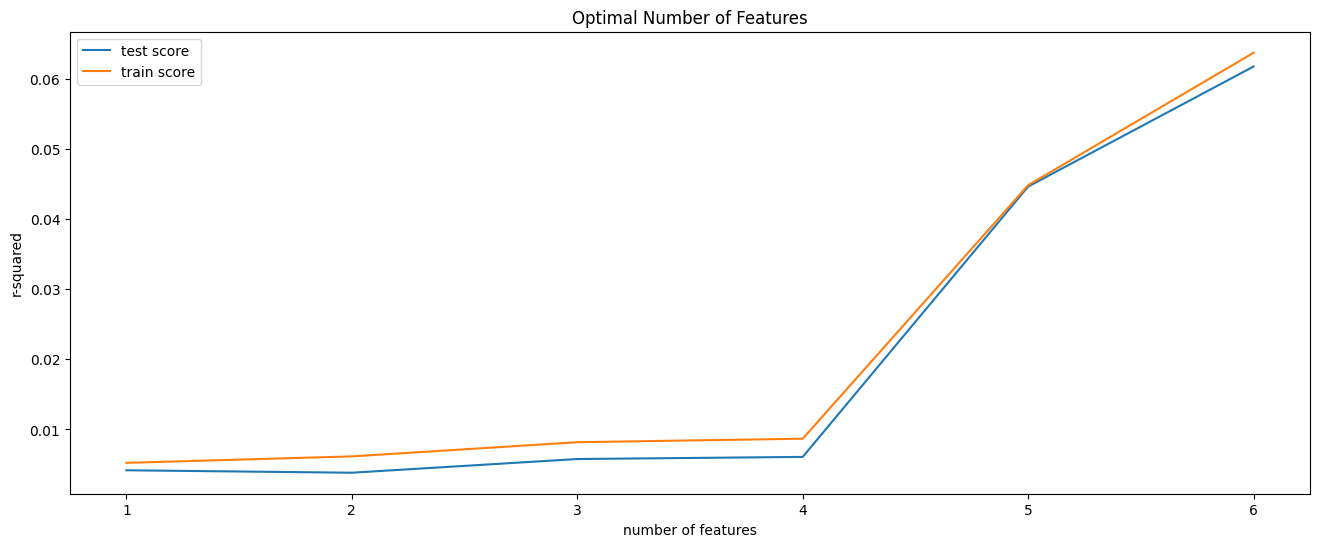

In [41]:
plt.figure(figsize=(16,6))

plt.plot(cv_results_R2["param_n_features_to_select"], cv_results_R2["mean_test_score"])
plt.plot(cv_results_R2["param_n_features_to_select"], cv_results_R2["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [42]:
cv_results_RMSE = pd.DataFrame(result_RMSE.cv_results_)
cv_results_RMSE 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.448141,0.008092,0.001082,0.000042,1,{'n_features_to_select': 1},-901.087188,-894.533167,-869.440954,-932.913986,...,-901.405161,20.592685,5,-899.680974,-905.522548,-911.618585,-891.548223,-897.675406,-901.209147,6.857375
1,0.459714,0.006775,0.001075,0.000040,2,{'n_features_to_select': 2},-901.872124,-894.533627,-869.442799,-932.921891,...,-901.564237,20.594472,6,-898.577331,-905.476691,-911.572774,-891.099212,-897.231056,-900.791413,7.066918
2,0.457338,0.007800,0.001071,0.000016,3,{'n_features_to_select': 3},-901.871404,-893.175486,-868.248881,-932.947513,...,-900.689019,20.943928,4,-898.133336,-904.293358,-910.347058,-889.984385,-896.618817,-899.875391,6.937525
3,0.452548,0.009841,0.001095,0.000043,4,{'n_features_to_select': 4},-901.538051,-893.143954,-868.132360,-932.966925,...,-900.551574,20.970871,3,-897.827985,-904.231847,-910.307430,-889.587368,-896.285816,-899.648089,7.077685
4,0.448367,0.007581,0.001340,0.000234,5,{'n_features_to_select': 5},-862.460069,-893.025950,-867.891305,-933.267217,...,-882.461679,28.366495,2,-854.505357,-904.082360,-910.186891,-889.477635,-856.080129,-882.866474,23.503564
5,0.445243,0.005089,0.001171,0.000067,6,{'n_features_to_select': 6},-862.460647,-893.026050,-867.891764,-892.891117,...,-874.310479,15.742827,1,-854.415085,-904.079355,-910.183838,-846.387202,-855.599504,-874.132997,27.197658


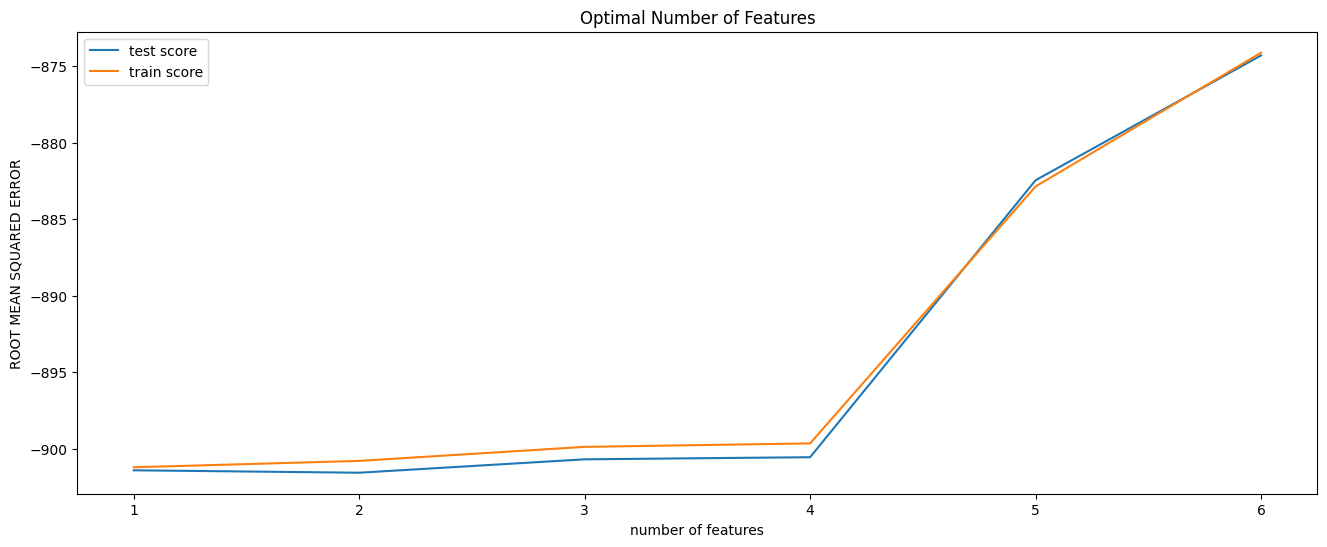

In [43]:
plt.figure(figsize=(16,6))

plt.plot(cv_results_RMSE["param_n_features_to_select"], cv_results_RMSE["mean_test_score"])
plt.plot(cv_results_RMSE["param_n_features_to_select"], cv_results_RMSE["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('ROOT MEAN SQUARED ERROR')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [44]:
# final model
n_features_optimal = 4

In [45]:
indp_vars = X
min_aic = 10**100 # initiailizing AIC to a very large value 
for i in range(indp_vars.shape[1],0,-1):
    regression_model = LinearRegression()
    rfe = RFE(regression_model, n_features_to_select=n_features_optimal)
    rfe = rfe.fit(X_train, y_train)
    chk = X_train.loc[:,list(rfe.support_)]
    regression_model=sm.OLS(y_train,chk)
    result=regression_model.fit()
    current_aic = result.aic
    if(current_aic <= min_aic):
        min_aic = current_aic
        Kfold = chk.columns
    else:
        break
print(Kfold)

Index(['type__RAIL', 'type__RM', 'type__SD', 'type__VM'], dtype='object')


In [46]:
Kfoldmodel_data = X_train.loc[:,Kfold]
Kfoldmodel_data_test = X_test.loc[:,Kfold]
Kfoldmodel_data['const'] =1
Kfoldmodel_data_test['const'] =1
Kfoldmodel_data.head()  

,type__RAIL,type__RM,type__SD,type__VM,const
10472,0,0,0,0,1
16416,0,0,0,0,1
15827,0,0,0,0,1
17982,0,0,0,0,1
12598,0,0,0,0,1


In [47]:
Kfold_model=sm.OLS(y_train,Kfoldmodel_data).fit()
print(Kfold_model.summary2()) #build a regression model

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.011      
Dependent Variable: ORDER_COST       AIC:                162346.5610
Date:               2023-08-17 22:53 BIC:                162382.5499
No. Observations:   9875             Log-Likelihood:     -81168.    
Df Model:           4                F-statistic:        28.50      
Df Residuals:       9870             Prob (F-statistic): 1.39e-23   
R-squared:          0.011            Scale:              8.0756e+05 
--------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
type__RAIL    2511.5107 898.6900   2.7946 0.0052  749.8947 4273.1267
type__RM      3284.8440 366.9817   8.9510 0.0000 2565.4850 4004.2031
type__SD      1976.5107 449.4134   4.3980 0.0000 1095.5687 2857.4527
type__VM       959.8440 366.9817   2.6155 0.0089  240

In [48]:
#get error metrics
scores = get_metrics(y_train,Kfold_model.predict(Kfoldmodel_data ),y_test,Kfold_model.predict(Kfoldmodel_data_test),"MLR_K-fold_CV",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,466804.382101,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,130805.725666,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792
2,MLR_K-fold_CV,646.949213,807152.867253,898.416867,6.564662e+02,8.562811e+05,9.253546e+02,0.011420


# PCA

In [49]:
import seaborn as sns

<AxesSubplot: >

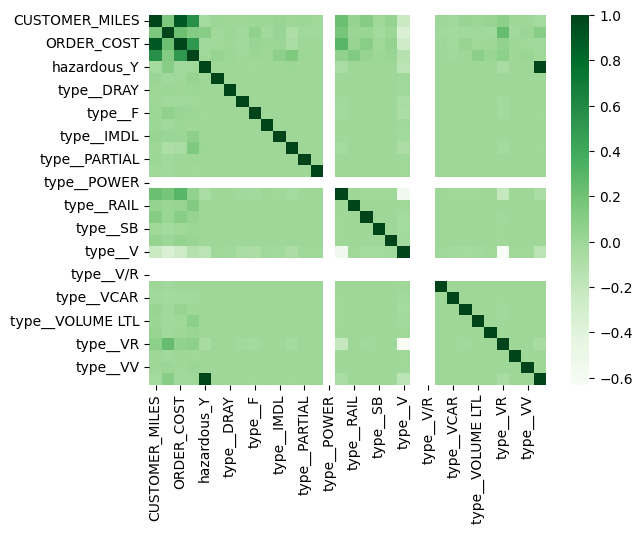

In [50]:
sns.heatmap(df_main4.corr(),annot=False,cmap='Greens')

In [51]:
numeric_std = StandardScaler().fit_transform(df_main4)

In [52]:
numeric_std[:5]

array([[-1.15634418,  0.83557523, -0.36633163, -0.25973674, -0.12172926,
        -0.00841943, -0.01190729, -0.04296893, -0.05656754, -0.01190729,
        -0.01684065, -0.05903653, -0.00841943, -0.00841943,  0.        ,
        -0.43063511, -0.00841943, -0.02663307, -0.02228046, -0.01684065,
         0.77852553,  0.        ,  0.        , -0.00841943, -0.01684065,
        -0.02663307, -0.01684065, -0.00841943, -0.49061189, -0.00841943,
        -0.00841943, -0.12142907],
       [-1.15634418,  0.83557523, -0.36633163, -0.25973674, -0.12172926,
        -0.00841943, -0.01190729, -0.04296893, -0.05656754, -0.01190729,
        -0.01684065, -0.05903653, -0.00841943, -0.00841943,  0.        ,
        -0.43063511, -0.00841943, -0.02663307, -0.02228046, -0.01684065,
         0.77852553,  0.        ,  0.        , -0.00841943, -0.01684065,
        -0.02663307, -0.01684065, -0.00841943, -0.49061189, -0.00841943,
        -0.00841943, -0.12142907],
       [-1.15634418,  0.83557523, -0.36633163, -0.2597

In [53]:
numeric_std_df = pd.DataFrame(numeric_std)
numeric_std_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.156344,0.835575,-0.366332,-0.259737,-0.121729,-0.008419,-0.011907,-0.042969,-0.056568,-0.011907,...,0.0,-0.008419,-0.016841,-0.026633,-0.016841,-0.008419,-0.490612,-0.008419,-0.008419,-0.121429
1,-1.156344,0.835575,-0.366332,-0.259737,-0.121729,-0.008419,-0.011907,-0.042969,-0.056568,-0.011907,...,0.0,-0.008419,-0.016841,-0.026633,-0.016841,-0.008419,-0.490612,-0.008419,-0.008419,-0.121429
2,-1.156344,0.835575,-0.366332,-0.259737,-0.121729,-0.008419,-0.011907,-0.042969,-0.056568,-0.011907,...,0.0,-0.008419,-0.016841,-0.026633,-0.016841,-0.008419,-0.490612,-0.008419,-0.008419,-0.121429
3,-1.156344,0.835575,-0.174420,-0.198414,-0.121729,-0.008419,-0.011907,-0.042969,-0.056568,-0.011907,...,0.0,-0.008419,-0.016841,-0.026633,-0.016841,-0.008419,-0.490612,-0.008419,-0.008419,-0.121429
4,-0.016016,1.000825,0.099738,-0.413043,-0.121729,-0.008419,-0.011907,-0.042969,-0.056568,-0.011907,...,0.0,-0.008419,-0.016841,-0.026633,-0.016841,-0.008419,-0.490612,-0.008419,-0.008419,-0.121429


In [54]:
from sklearn.decomposition import PCA
# from sklearn.naive_bayes import MultinomialNB 
# from sklearn.naive_bayes import GaussianNB 

In [55]:
pca = PCA()

In [56]:
principalComponents = pca.fit_transform(numeric_std_df)

In [57]:
pca.explained_variance_ratio_

array([9.52247618e-02, 7.10869921e-02, 5.46227078e-02, 4.17418328e-02,
       3.71968719e-02, 3.53294902e-02, 3.46965731e-02, 3.45495349e-02,
       3.45231160e-02, 3.45057988e-02, 3.45003427e-02, 3.44963325e-02,
       3.44943587e-02, 3.44934357e-02, 3.44902892e-02, 3.44890392e-02,
       3.44883869e-02, 3.44864527e-02, 3.44858408e-02, 3.44852792e-02,
       3.44852030e-02, 3.44852030e-02, 3.44852030e-02, 3.32034071e-02,
       2.53365233e-02, 1.61787856e-02, 3.00879828e-03, 4.29439648e-04,
       2.90467486e-31, 1.87764794e-32, 5.22926471e-34, 7.26603595e-35])

In [58]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(principalComponents.shape[1])]
principalComponents = pd.DataFrame(principalComponents, columns=component_names)

In [59]:
principalComponents.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-1.174182,0.018294,-0.055109,-0.047016,-0.389710,0.322208,-0.014695,0.001443,-0.003828,0.005844,...,5.275870e-15,0.100309,1.175088,0.128314,0.513343,0.000916,-6.546941e-15,6.068030e-17,-8.041156e-17,-1.226660e-17
1,-1.174182,0.018294,-0.055109,-0.047016,-0.389710,0.322208,-0.014695,0.001443,-0.003828,0.005844,...,7.012540e-15,0.100309,1.175088,0.128314,0.513343,0.000916,8.346186e-14,-1.129050e-15,1.370279e-16,-1.403358e-17
2,-1.174182,0.018294,-0.055109,-0.047016,-0.389710,0.322208,-0.014695,0.001443,-0.003828,0.005844,...,9.176733e-15,0.100309,1.175088,0.128314,0.513343,0.000916,6.327393e-14,-2.948159e-16,6.751674e-17,1.380648e-17
3,-1.052652,-0.009872,0.011377,-0.034776,-0.406823,0.316021,-0.014699,0.000412,-0.002134,0.006572,...,-5.600860e-15,0.070385,1.167840,0.109761,0.650539,0.000849,-3.549287e-14,1.962373e-16,4.851338e-17,1.479475e-17
4,1.188372,0.195567,-1.111466,-2.216657,0.490996,0.362624,-0.230532,-0.003893,-0.012076,-0.005935,...,8.356322e-14,0.540917,0.411004,0.110146,-0.088746,-0.001221,-1.227577e-14,-5.595794e-17,-3.085926e-18,-2.717688e-18


In [60]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_main4.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
CUSTOMER_MILES,5.035036e-01,-1.390771e-01,2.810890e-01,5.306492e-02,-8.314784e-02,-8.114981e-02,6.734420e-04,3.027139e-03,-9.211990e-03,-3.630365e-03,...,-0.000000e+00,-1.238210e-01,-1.143805e-01,-3.236276e-01,-7.059787e-01,3.410061e-05,-1.230991e-16,1.685741e-18,-0.000000e+00,0.000000e+00
WEIGHT,2.614753e-01,1.440063e-01,-2.830085e-01,-2.637079e-02,-2.633552e-01,1.875901e-01,6.629292e-03,4.231356e-03,-7.222758e-03,2.188178e-03,...,-1.025354e-14,1.561947e-02,8.462481e-01,-8.106941e-02,-4.965601e-02,2.082531e-04,-1.235031e-15,1.784893e-17,1.250926e-20,5.964553e-20
ORDER_COST,5.127908e-01,-1.140529e-01,2.551454e-01,-3.774512e-02,-1.306840e-01,-6.512486e-02,3.170972e-03,-6.391545e-03,7.535508e-03,3.551521e-03,...,8.219824e-15,-1.275127e-01,-7.075540e-02,-3.476978e-01,7.026785e-01,-2.467393e-04,5.330360e-17,-2.813110e-19,-2.173961e-20,-9.324439e-20
Days,3.770250e-01,-1.023853e-01,2.857216e-01,3.177314e-01,1.299221e-01,1.029155e-01,-9.985504e-03,3.189033e-03,4.051957e-03,7.500344e-04,...,1.923142e-17,-8.892059e-02,1.032444e-01,7.855870e-01,3.823020e-02,-3.256510e-04,1.028965e-16,-3.156486e-18,1.682515e-20,5.417352e-20
hazardous_Y,3.964611e-02,6.685726e-01,2.021258e-01,1.832773e-02,2.342774e-03,-1.741050e-02,-5.264818e-03,-6.433996e-04,7.211375e-05,-2.469801e-04,...,3.272709e-15,-1.676132e-02,-5.361935e-02,-5.864643e-03,-5.575749e-03,-7.118209e-01,-3.052438e-16,4.754285e-18,1.077014e-21,-2.070719e-20
type__D-LTL,7.008400e-03,-4.892815e-03,1.815624e-02,4.759163e-02,1.089576e-01,-1.043978e-02,-1.175935e-02,7.572000e-02,6.119386e-02,-1.359334e-01,...,-1.689503e-02,7.413285e-02,3.851531e-02,-4.341726e-02,1.361745e-02,-1.311385e-03,1.135100e-02,-1.554426e-04,-3.389670e-17,-6.600927e-17
type__DRAY,9.690852e-04,2.251329e-03,-1.282394e-02,-3.194707e-03,1.635366e-02,5.263539e-02,7.765585e-02,3.655875e-02,1.724264e-03,1.730363e-02,...,1.955192e-12,-4.718385e-02,-1.453306e-02,-6.099687e-03,6.678038e-04,-1.870456e-03,1.605216e-02,-2.198212e-04,-5.807651e-17,1.083470e-16
type__DROP,-3.221102e-03,2.990530e-03,-2.952263e-02,-1.976383e-02,1.760749e-01,-1.913502e-01,3.518778e-01,8.250600e-01,-2.438245e-01,8.362797e-02,...,2.907685e-13,-1.546765e-01,8.086215e-02,-1.006038e-02,8.433611e-03,-6.734000e-03,5.782764e-02,-7.919022e-04,7.665659e-19,-2.487293e-18
type__F,2.565500e-02,8.351742e-03,-4.993848e-02,-1.371004e-02,-9.997562e-02,4.071205e-01,8.387046e-01,-2.303216e-01,5.025309e-02,-6.827131e-02,...,4.320290e-13,-4.238266e-02,-1.513664e-01,2.603700e-03,-8.080097e-03,-8.855390e-03,7.602595e-02,-1.041113e-03,3.905249e-19,-2.659759e-18
type__FH,-8.329472e-04,-1.552935e-03,6.366810e-04,-4.241434e-03,7.902590e-02,-1.604019e-01,5.930251e-02,-3.165144e-02,1.519086e-01,-8.028769e-02,...,-8.446649e-13,-1.785443e-02,6.326688e-02,-7.000563e-04,-8.585182e-04,-1.865555e-03,1.605216e-02,-2.198212e-04,-2.581616e-17,3.128083e-17


In [61]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

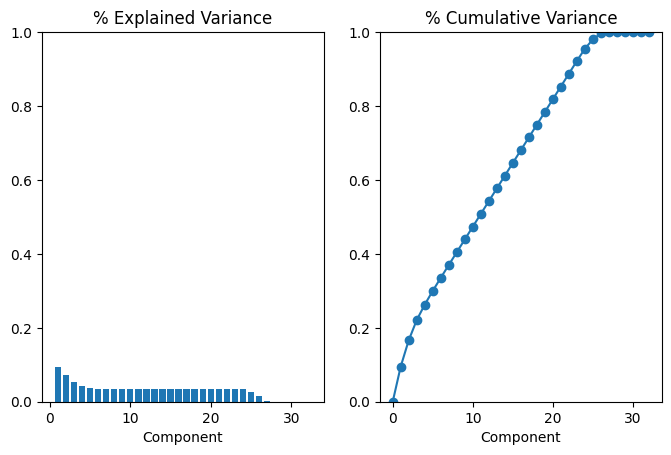

In [62]:
plot_variance(pca);

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09522476, 0.16631175, 0.22093446, 0.26267629, 0.29987317,
       0.33520266, 0.36989923, 0.40444876, 0.43897188, 0.47347768,
       0.50797802, 0.54247435, 0.57696871, 0.61146215, 0.64595244,
       0.68044148, 0.71492986, 0.74941632, 0.78390216, 0.81838744,
       0.85287264, 0.88735784, 0.92184305, 0.95504645, 0.98038298,
       0.99656176, 0.99957056, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

<AxesSubplot: >

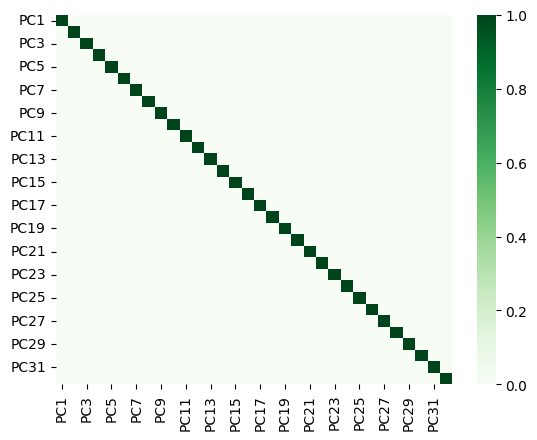

In [64]:
sns.heatmap(principalComponents.corr(),annot=False,cmap='Greens')

In [65]:
from sklearn import metrics
import math

# Assuming df is your dataframe and 'ORDER_COST' is your target column
X_t = df_main4.drop('ORDER_COST', axis=1)
y_t = df_main4['ORDER_COST']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=22)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train the model
kush_model = LinearRegression()
kush_model.fit(X_train, Y_train)

# Predict the target for the training data
Y_train_pred = kush_model.predict(X_train)

# Predict the target for the testing data
Y_test_pred = kush_model.predict(X_test)

# Calculate the metrics for the training data
MAE_Train = metrics.mean_absolute_error(Y_train, Y_train_pred)
MSE_Train = metrics.mean_squared_error(Y_train, Y_train_pred)
RMSE_Train = math.sqrt(MSE_Train)
R2_Train = metrics.r2_score(Y_train, Y_train_pred)

# Calculate the metrics for the testing data
MAE_Test = metrics.mean_absolute_error(Y_test, Y_test_pred)
MSE_Test = metrics.mean_squared_error(Y_test, Y_test_pred)
RMSE_Test = math.sqrt(MSE_Test)
R2_Test = metrics.r2_score(Y_test, Y_test_pred)

In [66]:
#Get error metrics
scores = get_metrics(y_train,kush_model.predict(X_train),y_test,kush_model.predict(X_test),"MLR_usingPCA",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,466804.382101,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,130805.725666,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792
2,MLR_K-fold_CV,646.949213,807152.867253,898.416867,6.564662e+02,8.562811e+05,9.253546e+02,0.011420
3,MLR_usingPCA,244.108299,130801.406571,361.664771,2.555556e+02,1.491887e+05,3.862495e+02,0.839798


# RIDGE REGULARISATION

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet #import necessary modules

In [69]:

ridgeR = Ridge(alpha = 1,fit_intercept=False)
ridgeR.fit(X_train, y_train) #build ridge model
y_pred = ridgeR.predict(X_test)

ridge_coefficient = pd.DataFrame()
ridge_coefficient= pd.Series(ridgeR.coef_)
print(ridge_coefficient)

0     315.459336
1    -221.883782
2     329.377406
3     -84.809159
4    -137.366950
5      98.217283
6       2.464973
7     -10.595517
8       2.150117
9      -0.436780
10     -2.759585
11      8.678842
12     -4.014475
13     -8.453135
14    -20.431235
15      8.894497
16     -8.164624
17     -1.315923
18   -276.506862
19   -104.502960
20   -495.385560
21      1.305589
dtype: float64


In [70]:
#get error metrics
scores = get_metrics(y_train,ridgeR.predict(X_train),y_test,ridgeR.predict(X_test),"MLR_Ridge",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,4.668044e+05,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,1.308057e+05,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792
2,MLR_K-fold_CV,646.949213,8.071529e+05,898.416867,6.564662e+02,8.562811e+05,9.253546e+02,0.011420
3,MLR_usingPCA,244.108299,1.308014e+05,361.664771,2.555556e+02,1.491887e+05,3.862495e+02,0.839798
4,MLR_Ridge,1204.252224,1.575902e+06,1255.349284,1.209535e+03,1.605195e+06,1.266963e+03,-0.930125


In [71]:
df_main4

,CUSTOMER_MILES,WEIGHT,ORDER_COST,Days,hazardous_Y,type__D-LTL,type__DRAY,type__DROP,type__F,type__FH,...,type__V/R,type__VA,type__VCAR,type__VM,type__VOLUME LTL,type__VP,type__VR,type__VS,type__VV,type__VZ
1,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,40500,875.0,1.083333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,40500,1050.0,1.166667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,560,43168,1300.0,0.875000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18199,1230,42500,2750.0,2.416667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18200,707,26405,1500.0,1.895833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18202,1924,42000,2500.0,2.916667,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18203,2185,40000,5300.0,3.645833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.235797,-0.391868,-2.042462,1.270242,-0.037134,0.054133,-0.176469,-0.003758,-0.010219,-0.001821,...,0.011959,0.001804,0.004798,-0.002626,0.000928,1.166281e-12,0.275129,0.245227,-0.052685,-0.001447
1,-1.258960,0.205785,0.616301,0.104222,0.121238,0.073077,-0.030420,-0.002781,0.001628,-0.000979,...,0.003743,0.001402,0.001752,-0.000475,0.000196,1.613733e-13,-0.091995,-0.636785,0.096444,0.000479
2,-1.681259,0.536778,-0.059511,-0.069298,0.191037,0.050308,-0.024909,-0.004588,0.000608,-0.000849,...,0.002624,0.001279,0.001351,-0.000186,0.000184,2.037883e-13,0.277272,-0.557519,-0.048890,0.001208
3,0.398709,-0.335587,-0.550674,-2.216288,0.977362,-0.092721,-0.256736,-0.003133,0.001831,-0.004305,...,0.019602,0.004360,0.006397,-0.001307,0.001442,1.953923e-12,0.910817,-1.443279,0.383767,-0.002187
4,1.042967,-1.095048,2.523803,0.616833,-0.890602,0.001805,-0.032105,0.012504,-0.006694,0.001112,...,0.001725,-0.002066,0.000279,-0.002027,-0.000002,7.566932e-14,-1.568918,0.892890,0.154160,-0.001182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,0.224504,-0.870036,2.607060,0.544992,-0.273276,0.185264,-0.039301,0.000928,0.001158,-0.000994,...,0.006118,0.001494,0.003037,-0.001810,0.000181,2.553809e-13,-1.304601,-0.624331,0.005712,-0.001357
9871,5.009933,10.434306,0.811868,-0.024106,-0.014111,0.110049,-0.044771,0.027578,0.042743,-0.004236,...,0.011385,0.004453,0.002274,0.002106,0.000282,3.527896e-13,0.043433,-0.169411,-0.148271,0.018292
9872,-1.614749,0.485192,0.056787,-0.027986,0.185563,0.043545,-0.026605,-0.003748,0.001009,-0.000860,...,0.002815,0.001236,0.001332,-0.000181,0.000188,2.512772e-13,0.220916,-0.560541,0.046161,0.001045
9873,-1.383912,0.301640,0.378633,-0.000594,0.120787,0.105915,-0.025623,-0.005442,0.000410,-0.000977,...,0.003354,0.001603,0.001947,-0.000580,0.000186,2.555686e-13,0.010375,-0.649514,-0.222509,0.000876


In [73]:
lasso = Lasso(alpha = 1,fit_intercept=True)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)#build a lasso model

lasso_coeff = pd.DataFrame()
lasso_coeff = pd.Series(lasso.coef_)
print(lasso_coeff)

0     315.026890
1    -221.393522
2     328.699321
3     -83.990260
4    -136.437189
5      97.243335
6       1.471767
7      -9.598783
8       1.151345
9      -0.000000
10     -1.760319
11      7.680156
12     -3.015289
13     -7.454253
14    -19.433475
15      7.895520
16     -7.165553
17     -0.316158
18   -275.440936
19   -103.155667
20   -492.874626
21      0.000000
dtype: float64


In [74]:
lasso_coeff[lasso_coeff>0]

0     315.026890
2     328.699321
5      97.243335
6       1.471767
8       1.151345
11      7.680156
15      7.895520
dtype: float64

In [75]:
#get error metrics
scores = get_metrics(y_train,lasso.predict(X_train),y_test,lasso.predict(X_test),"MLR_Lasso",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,4.668044e+05,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,1.308057e+05,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792
2,MLR_K-fold_CV,646.949213,8.071529e+05,898.416867,6.564662e+02,8.562811e+05,9.253546e+02,0.011420
3,MLR_usingPCA,244.108299,1.308014e+05,361.664771,2.555556e+02,1.491887e+05,3.862495e+02,0.839798
4,MLR_Ridge,1204.252224,1.575902e+06,1255.349284,1.209535e+03,1.605195e+06,1.266963e+03,-0.930125
5,MLR_Lasso,244.361754,1.308221e+05,361.693406,2.557910e+02,1.491831e+05,3.862423e+02,0.839772


# Elastic Net Regularization

In [76]:
e_net = ElasticNet(alpha = 1,fit_intercept=True)
e_net.fit(X_train, y_train)
y_pred2 = e_net.predict(X_test)# build a elastic net model
 
e_net_coeff = pd.DataFrame()
e_net_coeff= pd.Series(e_net.coef_)
print(e_net_coeff)

0     257.692502
1    -177.207091
2     243.607006
3     -59.733530
4     -93.044077
5      65.512040
6       1.315199
7      -6.736721
8       1.100931
9      -0.000000
10     -1.506956
11      5.454085
12     -2.343708
13     -5.303210
14    -13.289682
15      5.597202
16     -5.110508
17     -0.544090
18   -178.251214
19    -61.776127
20   -212.852911
21      0.000000
dtype: float64


# COMPARING FINAL MODELS

In [77]:
#get error metrics
scores = get_metrics(y_train,e_net.predict(X_train),y_test,e_net.predict(X_test),"MLR_ElasticNet",scores)
scores

,Model,MAE_Train,MSE_Train,RMSE_Train,MAE_Test,MSE_Test,RMSE_Test,R^2
0,MLR,468.019220,4.668044e+05,683.230841,4.635305e+02,4.549709e+05,6.745153e+02,0.464719
1,MLR_Standardization,244.304659,1.308057e+05,361.670742,1.469023e+12,1.522916e+27,3.902456e+13,0.839792
2,MLR_K-fold_CV,646.949213,8.071529e+05,898.416867,6.564662e+02,8.562811e+05,9.253546e+02,0.011420
3,MLR_usingPCA,244.108299,1.308014e+05,361.664771,2.555556e+02,1.491887e+05,3.862495e+02,0.839798
4,MLR_Ridge,1204.252224,1.575902e+06,1255.349284,1.209535e+03,1.605195e+06,1.266963e+03,-0.930125
5,MLR_Lasso,244.361754,1.308221e+05,361.693406,2.557910e+02,1.491831e+05,3.862423e+02,0.839772
6,MLR_ElasticNet,314.781569,1.971734e+05,444.042123,3.267947e+02,2.186055e+05,4.675527e+02,0.758507
